In [2]:
# Support Vector Machine (SVM)
# Importing the libraries

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
# Importing the dataset
dataset = pd.read_csv('heart.csv')

In [4]:
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [7]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=20, shuffle=True)

In [8]:
# Feature Scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [60]:
# Fitting SVM to the Training set
classifier = SVC(kernel='rbf', random_state=20, degree=3, gamma='auto', max_iter=500, C=1.0)
classifier.fit(X_train, y_train)

SVC(gamma='auto', max_iter=500, random_state=20)

In [61]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)

[1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0
 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0
 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1]


In [62]:
print('SVCModel Train Score is : ' , classifier.score(X_train, y_train))
print('SVCModel Test Score is : ' , classifier.score(X_test, y_test))

SVCModel Train Score is :  0.9292452830188679
SVCModel Test Score is :  0.8021978021978022


In [63]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[31  8]
 [10 42]]


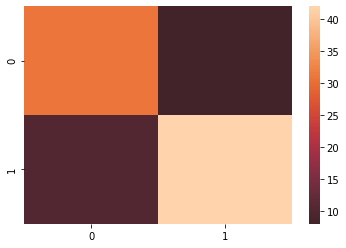

In [64]:
sns.heatmap(cm, center=True)
plt.show()